<a href="https://colab.research.google.com/github/shebin-sam/Economic-Growth-DS-Hackathon/blob/main/Activity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
path='drive/My Drive/Colab Notebooks/Social_Network.csv'
#For temporary storage directly upload the file on colab


#Can write the path directly as well
df = pd.read_csv(path)
df

Mounted at /content/drive


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,No
1,15603246,0,27,57000,No
2,15598044,0,27,84000,No
3,15727311,0,35,65000,No
4,15570769,0,26,80000,No
...,...,...,...,...,...
395,15672330,1,47,34000,Yes
396,15807837,1,48,33000,Yes
397,15592570,1,47,23000,Yes
398,15635893,1,60,42000,Yes


In [5]:
x=df.iloc[:, 1:-1].values

df['Purchased'] = df['Purchased'].replace({'Yes':1,'No':0})

In [6]:
df.head()
y = df.iloc[:, -1].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

In [8]:
standard_Scalar = StandardScaler()
x_train = standard_Scalar.fit_transform(x_train)
x_test = standard_Scalar.transform(x_test)

In [9]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
y_pred = knn.predict(x_test)
print(y_pred)
print(y_test)

[1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0]
[1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0]


In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [12]:
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)
recall = tp / (tp + fn)
precision = tp / (tp + fp)
f1_score = 2 * precision * recall / (precision + recall)

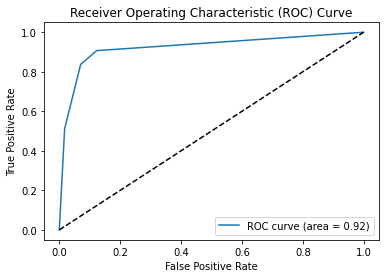

In [13]:
y_pred_proba = knn.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [14]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy: ", accuracy)
print("Specificity: ", specificity)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1-score: ", f1_score)
print("Classification Report:\n", report)
print("AUC score: ", auc_score)
print("True positive: ",tp)
print("True negative: ", tn)

Confusion Matrix:
 [[53  4]
 [ 7 36]]
Accuracy:  0.89
Specificity:  0.9298245614035088
Recall:  0.8372093023255814
Precision:  0.9
F1-score:  0.8674698795180723
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91        57
           1       0.90      0.84      0.87        43

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.89       100
weighted avg       0.89      0.89      0.89       100

AUC score:  0.9222766217870256
True positive:  36
True negative:  53


[1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0]
[1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0]


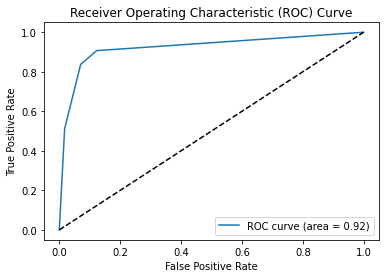

Confusion Matrix:
 [[53  4]
 [ 7 36]]
Accuracy:  0.89
Specificity:  0.9298245614035088
Recall:  0.8372093023255814
Precision:  0.9
F1-score:  0.8674698795180723
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91        57
           1       0.90      0.84      0.87        43

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.89       100
weighted avg       0.89      0.89      0.89       100

AUC score:  0.9222766217870256
True positive:  36
True negative:  53
[1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1
 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0]
[1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0]


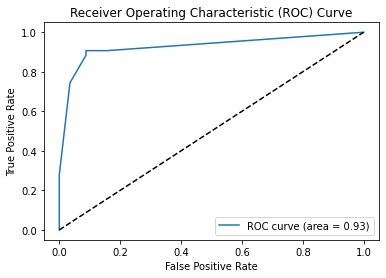

Confusion Matrix:
 [[52  5]
 [ 5 38]]
Accuracy:  0.9
Specificity:  0.9122807017543859
Recall:  0.8837209302325582
Precision:  0.8837209302325582
F1-score:  0.8837209302325582
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        57
           1       0.88      0.88      0.88        43

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

AUC score:  0.927376580987352
True positive:  38
True negative:  52
[1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0]
[1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0

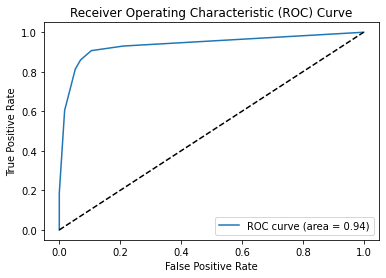

Confusion Matrix:
 [[53  4]
 [ 6 37]]
Accuracy:  0.9
Specificity:  0.9298245614035088
Recall:  0.8604651162790697
Precision:  0.9024390243902439
F1-score:  0.8809523809523809
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        57
           1       0.90      0.86      0.88        43

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

AUC score:  0.9361485108119134
True positive:  37
True negative:  53
[1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0]
[1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 

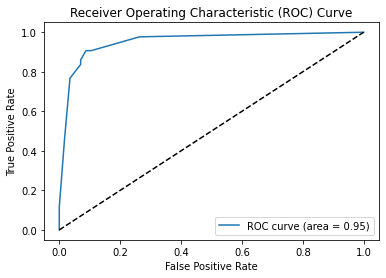

Confusion Matrix:
 [[53  4]
 [ 6 37]]
Accuracy:  0.9
Specificity:  0.9298245614035088
Recall:  0.8604651162790697
Precision:  0.9024390243902439
F1-score:  0.8809523809523809
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        57
           1       0.90      0.86      0.88        43

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

AUC score:  0.9524683802529581
True positive:  37
True negative:  53
[1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0]
[1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 

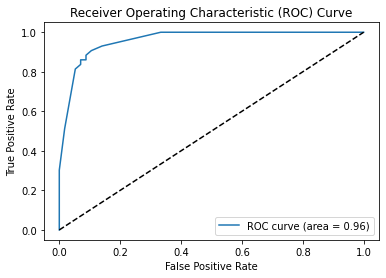

Confusion Matrix:
 [[53  4]
 [ 6 37]]
Accuracy:  0.9
Specificity:  0.9298245614035088
Recall:  0.8604651162790697
Precision:  0.9024390243902439
F1-score:  0.8809523809523809
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        57
           1       0.90      0.86      0.88        43

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100

AUC score:  0.9608323133414933
True positive:  37
True negative:  53


,3,5,7,9,11
Accuracy,0.890000,0.900000,0.900000,0.900000,0.900000
f1 Score,0.867470,0.883721,0.880952,0.880952,0.880952
AUC Score,0.922277,0.927377,0.936149,0.952468,0.960832


In [21]:
a = {}
for i in [3,5,7,9,11]:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  print(y_pred)
  print(y_test)
  conf_matrix = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred)
  tn, fp, fn, tp = conf_matrix.ravel()
  specificity = tn / (tn + fp)
  recall = tp / (tp + fn)
  precision = tp / (tp + fp)
  f1_score = 2 * precision * recall / (precision + recall)
  y_pred_proba = knn.predict_proba(x_test)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
  auc_score = auc(fpr, tpr)
  plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()
  print("Confusion Matrix:\n", conf_matrix)
  print("Accuracy: ", accuracy)
  print("Specificity: ", specificity)
  print("Recall: ", recall)
  print("Precision: ", precision)
  print("F1-score: ", f1_score)
  print("Classification Report:\n", report)
  print("AUC score: ", auc_score)
  print("True positive: ",tp)
  print("True negative: ", tn)
  a[i]=[accuracy,f1_score,auc_score]

a = pd.DataFrame(a,index=('Accuracy','f1 Score ','AUC Score'))
a